## Crosstalk Interface

Here is what I hope to be an enlightening example of how the MMT can be used for crosstalk analysis. The setup below is for 90 and 150 GHz bands for a LAT. The 1722 constitutes about one wafer of multichroic detectors. The main parameter that will need to be changed is the path_to_positions, which is a path to a text file of the focal plane mapped to the sky in degrees. I have provided a SAT file for this, which is what I have been working with to develop the modules.

Feel free to email hryciuk@uchicago.edu if you have questions or comments. Thanks!

In [1]:
#path to a text file of detector positions on sky
#it is assumed that this file is in units of degrees so scale appropriately
path_to_positions = '/home/ahryciuk/CMBS4_Noise_Modeling/MapMultiTool/positions.txt'

num_det = 1722    #number of detectors to select from file. 1722 is about on wafer's worth in positions.txt

#frequencies represented in position data in GHz
freqs = [90,150]

num_det = 1722    #number of detectors (1 wafer is ~1725 which includes both 90 GHz and 150 GHz detectors)

#Map Parameters:
#rescale the field of view to ~2/3 of a degree spread in detectors on sky
#This rescales the field of view from a SAT packing density to a LAT packing density as is, but can certainly be changed 
rescale = (2./3.) / 12.5 

N = 1024    #number of pixels in horizontal and vertical edges of maps
pixel_size = 0.25 * 1/60.    #size of each pixel in deg

#Main beam fwhm in deg
beam_fwhm = 1.5 * 1/60.

#Correlation Parameters:
freq1 = freqs[0]    #frequency in question
freq2 = freqs[0]    #frequency correlated to freq1
perc_corr = 0.03    #percent at which the signals are correlated
TtoP_suppress = True #suppress the T->P leakage that results from imbalanced detectors along certain polarization angles

#Power Spectrum Binning Parameters:
delta_ell = 50    #bin width
ell_max = 5000    #maximum ell of Fourier Transform

#Observation Parameters:
scan_sp = 3 #deg/s scan speed
tau_d_mean = 3e-3 #s mean of distribution of detector time constants
tau_unc = 0.3 #30% uncertainty (global shift?)

#choose normalization of power spectra
## 0 normalizes all PS to 1 for use with biasing spectra
## 'TT', 'EE', 'BB' normalizes to a main spectrum to study leakage
choose_normalization = 'TT'

assert(choose_normalization in [0,'TT','EE','BB'])

#sky decomposition in I, Q, U space
sky_decomp = [1., 0, 0]

central beam values II:1.0, QQ:0.9999999999999999, UU:0.9999999999999999
IQ: 0.0
IU: 0.0
QI: 0.0
QU: 3.492096007405312e-16
UI: 0.0
UQ: 0.0


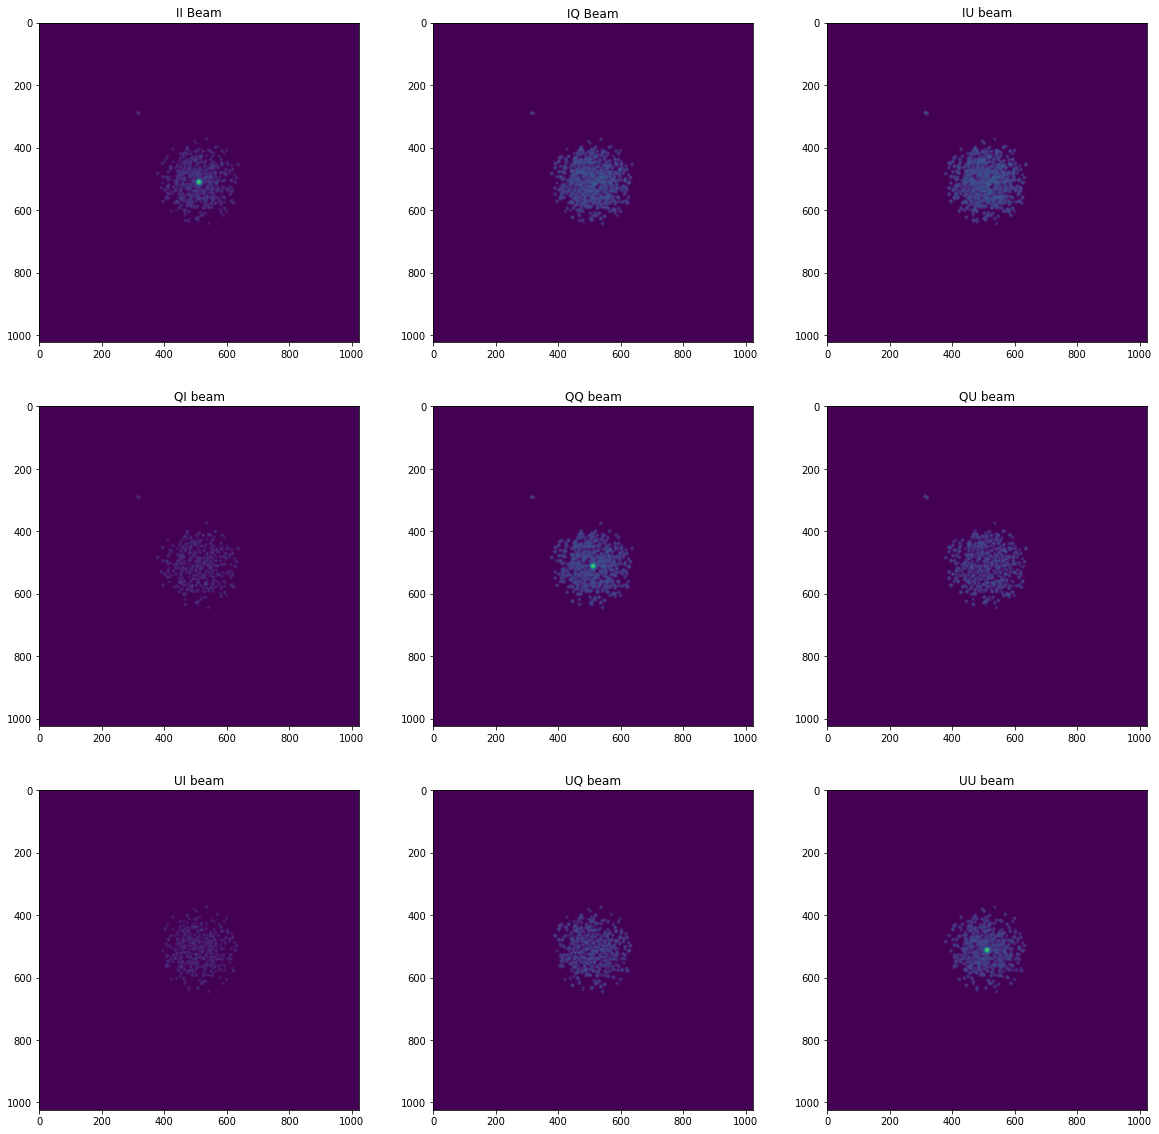

/home/ahryciuk/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ahryciuk/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


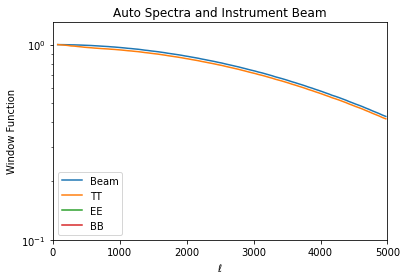

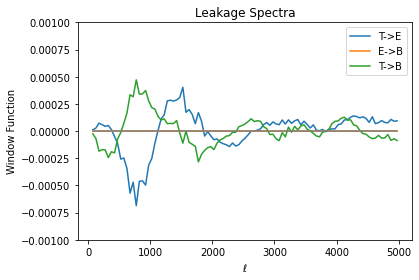

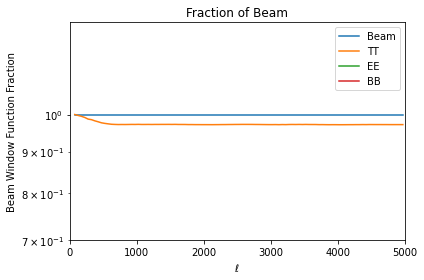

In [2]:
from MMTModules import *
%matplotlib inline
#use above parameters to calculate the beam matrix and display power spectra for a pure T sky


#generate focal plane distribution
det_dict = generate_focal_plane_distribution(path_to_positions, num_det, freqs, rescale)

#generate random coupling
coupling_matrix = generate_random_coupling(det_dict)


beam_matrix, binned_ell, binned_spectra = calculate_crosstalk(det_dict, [freq1,freq2], pixel_size, perc_corr, N, beam_fwhm, sky_decomp, TtoP_suppress, delta_ell, ell_max, choose_normalization)

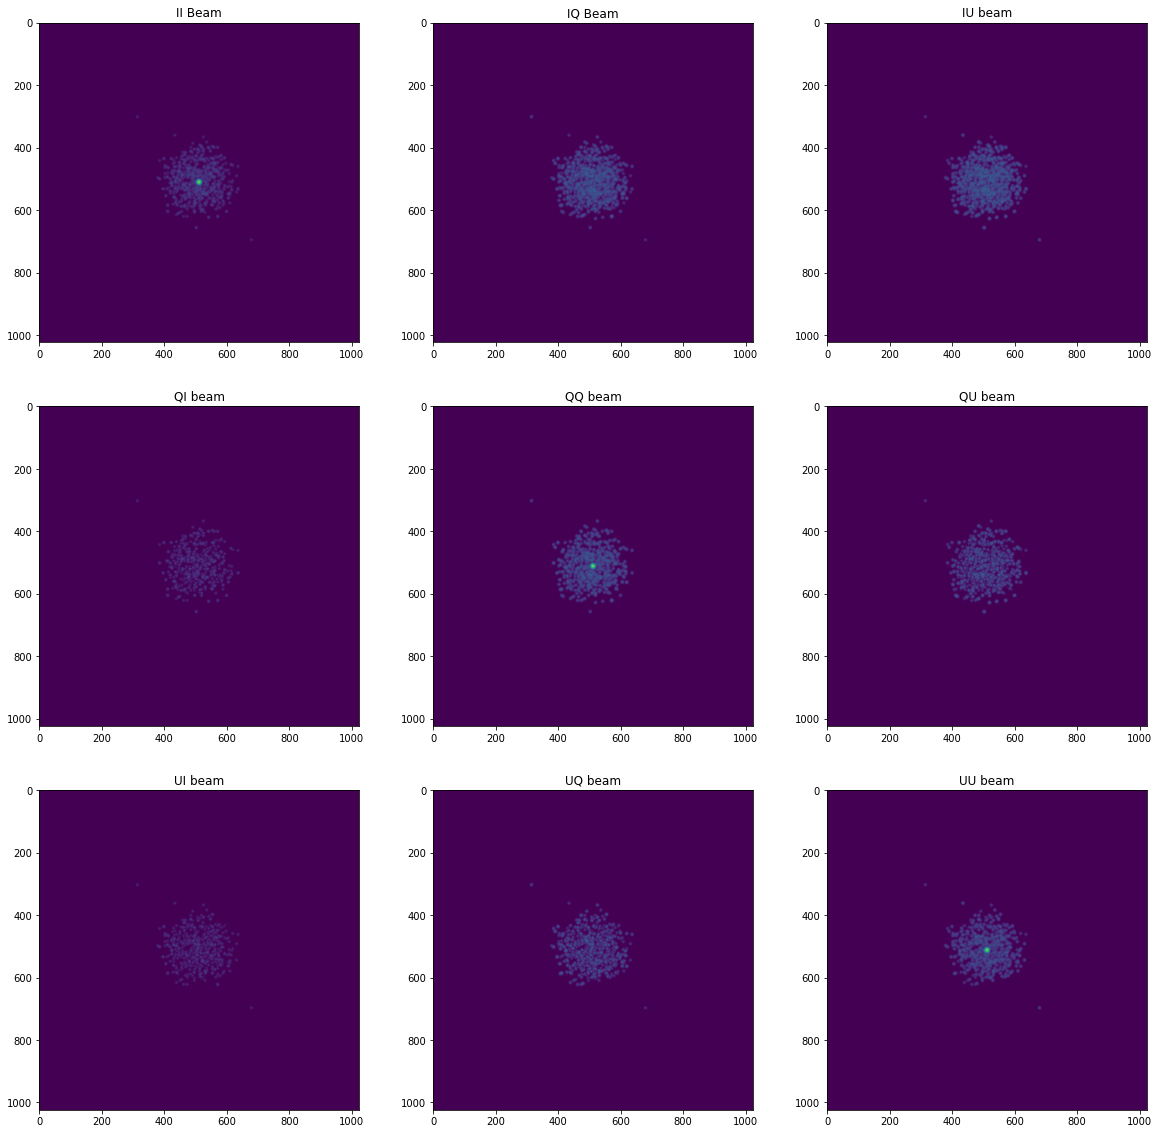

In [8]:
import matplotlib.pyplot as plt
import numpy as np

#Plot beam maps in 3x3 matrix
fig, ax = plt.subplots(3,3, figsize=(20,20))

#tiny offset to avoid numerical errors in log space
eta = 0.0000001

#make colormap relative to II beam
vmin = 10.*np.log(np.min(beam_matrix['II']) + eta)
vmax = 1.*np.log(np.max(beam_matrix['II']) + eta)

#II
ax[0,0].imshow(10. * np.log(np.abs(beam_matrix['II']) + eta),vmin=vmin,vmax=vmax)
ax[0,0].set_title('II Beam')

#IQ
ax[0,1].imshow(10. * np.log(np.abs(beam_matrix['IQ']) + eta),vmin=vmin,vmax=vmax)
ax[0,1].set_title('IQ Beam')

#IU
ax[0,2].imshow(10. * np.log(np.abs(beam_matrix['IU']) + eta),vmin=vmin,vmax=vmax)
ax[0,2].set_title('IU beam')

#QI
ax[1,0].imshow(10.*np.log(np.abs(beam_matrix['QI']) + eta),vmin=vmin,vmax=vmax)
ax[1,0].set_title('QI beam')

#QQ
ax[1,1].imshow(10. * np.log(np.abs(beam_matrix['QQ']) + eta),vmin=vmin,vmax=vmax)
ax[1,1].set_title('QQ beam')

#QU
ax[1,2].imshow(10. * np.log(np.abs(beam_matrix['QU']) + eta),vmin=vmin,vmax=vmax)
ax[1,2].set_title('QU beam')

#UI
ax[2,0].imshow(10. * np.log(np.abs(beam_matrix['UI']) + eta),vmin=vmin,vmax=vmax)
ax[2,0].set_title('UI beam')

#UQ
ax[2,1].imshow(10. * np.log(np.abs(beam_matrix['UQ']) + eta),vmin=vmin,vmax=vmax)
ax[2,1].set_title('UQ beam')

#UU
ax[2,2].imshow(10. * np.log(np.abs(beam_matrix['UU']) + eta),vmin=vmin,vmax=vmax)
ax[2,2].set_title('UU beam')
plt.savefig("Beam Matrix.png")
plt.show()


## Detector Time Constant Calibration:

I'm working on finishing the preliminary modules for this. To Be Continued